#Working with Time series data in Pandas

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime # To manually Create dates
time_stamp = pd.Timestamp(datetime(2017,1,1))
pd.Timestamp('2017-01-01') == time_stamp

True

In [ ]:
time_stamp

Timestamp('2017-01-01 00:00:00')

In [ ]:
time_stamp.year

2017

In [ ]:
time_stamp.day_name()  #Retrive Day name

'Sunday'

In [ ]:
period =pd.Period('2017-01')  # Periods has default montly frequency
period

Period('2017-01', 'M')

In [ ]:
period.asfreq('D') # Convert to daily

Period('2017-01-31', 'D')

In [ ]:
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [ ]:
period+2

Period('2017-03', 'M')

In [ ]:
# To Create a sequence of timestamps use pandas date range

index = pd.date_range(start='2017-01-01', periods=12, freq='M')
index


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
index[0]

Timestamp('2017-01-31 00:00:00', freq='M')

In [ ]:
#convert to period
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

In [ ]:
#create a time series
pd.DataFrame({'data': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [ ]:
data = np.random.random(size= (12,2))
pd.DataFrame(data=data, index=index).info()
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


array([[0.89640449, 0.83054612],
       [0.01368312, 0.42975978],
       [0.07604439, 0.50768843],
       [0.75840571, 0.47932187],
       [0.43697756, 0.83498691],
       [0.75292755, 0.76499987],
       [0.23229177, 0.31972906],
       [0.05523216, 0.77018967],
       [0.97225083, 0.82661656],
       [0.14792685, 0.96342925],
       [0.81110004, 0.19184785],
       [0.37043418, 0.1310021 ]])

#Indexing and Resampling time Series

In [ ]:
google = pd.read_csv('google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


Converting string dates to datetime64

In [ ]:
google['Date']= pd.to_datetime(google['Date'])
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


Setting Date columns as the Index Column

In [ ]:
google.set_index('Date',inplace= True) #inplace >> don't create copy
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [ ]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [ ]:
import matplotlib.pyplot as plt


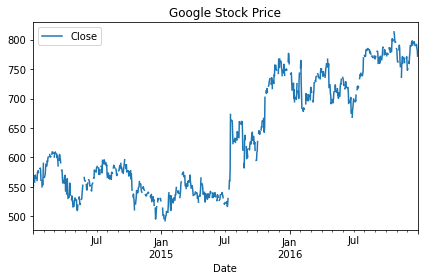

In [ ]:
google.plot(title = 'Google Stock Price')
plt.tight_layout();
plt.show()

partial string indexing

In [ ]:
google['2015'].info() # pass string for part of date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<ipython-input-51-d0b98ae11860>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2015'].info() # pass string for part of date


In [ ]:
google['2015-3': '2016-2'].info() #slice includes last month

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [ ]:
google.loc['2016-2-1', 'Close'] #use full date with loc

752.0

asfreq() to set frequency

In [ ]:
google.asfreq('D').info() #set calender day Frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [ ]:
google.asfreq('B') #Convert to Business days Frequency

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


In [ ]:
## Business Days that are not trading days

google[google.Close.isnull()] #select missing price dates



,Close
Date,
2014-01-04,NaN
2014-01-05,NaN
2014-01-11,NaN
2014-01-12,NaN
2014-01-18,NaN
...,...
2016-12-17,NaN
2016-12-18,NaN
2016-12-24,NaN


Lags, change,Returns for Stock Prices

In [ ]:
import pandas as pd

In [ ]:
google=pd.read_csv('google.csv', parse_dates =['Date'], index_col= 'Date')

In [ ]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


shift(): moving data between past and future

In [ ]:
google['shifted']= google['Close'].shift()  # Default Shifted periods=1
google

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN
...,...,...
2016-12-26,NaN,NaN
2016-12-27,791.55,NaN
2016-12-28,785.05,791.55


In [ ]:
google['lagged']= google['Close'].shift(periods=-1) #lagged to 1 period back
google.head()

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,NaN
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,558.10
2014-01-06,558.10,NaN,568.86


In [ ]:
google['Change']= google['Close'].div(google['shifted']) 
google.head()

,Close,shifted,lagged,Change
Date,,,,
2014-01-02,556.00,NaN,551.95,NaN
2014-01-03,551.95,556.00,NaN,0.992716
2014-01-04,NaN,551.95,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN
2014-01-06,558.10,NaN,568.86,NaN


In [ ]:
google['Return']= google['Change'].sub(1).mul(100) #Calculated One-period % change
google.head()

,Close,shifted,lagged,Change,Return
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN
2014-01-06,558.10,NaN,568.86,NaN,NaN


In [ ]:
#Built in time-series Change
google['diff']= google['Close'].diff() #Difference in value for two adjacent Periods
google.head()

,Close,shifted,lagged,Change,Return,diff
Date,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN


In [ ]:
#percentage Change for two adjusent periods
google['Pct_change']= google['Close'].pct_change().mul(100)
google.head(10)

,Close,shifted,lagged,Change,Return,diff,Pct_change
Date,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN,0.000000
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN,0.000000
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN,1.114231
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,10.76,1.927970
2014-01-08,570.04,568.86,564.55,1.002074,0.207432,1.18,0.207432
2014-01-09,564.55,570.04,564.52,0.990369,-0.963090,-5.49,-0.963090
2014-01-10,564.52,564.55,NaN,0.999947,-0.005314,-0.03,-0.005314


In [ ]:
#Get multiperiod Returns

google['Return_3d']= google['Close'].pct_change(periods=3).mul(100)
google.head(10)

,Close,shifted,lagged,Change,Return,diff,Pct_change,Return_3d
Date,,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05,-0.728417,NaN
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN,0.000000,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN,0.000000,-0.728417
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN,1.114231,1.114231
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,10.76,1.927970,3.063683
2014-01-08,570.04,568.86,564.55,1.002074,0.207432,1.18,0.207432,3.277471
2014-01-09,564.55,570.04,564.52,0.990369,-0.963090,-5.49,-0.963090,1.155707
2014-01-10,564.52,564.55,NaN,0.999947,-0.005314,-0.03,-0.005314,-0.762929
